In [8]:
# Importing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# reading the enriched csv
df = pd.read_csv('dataset/df_rich.csv')

# we have a categorical column (gas_type) but we had already categorilized it on the column "gas_type_coded"
# E10 = 0 /// SP98 = 1
df = df.drop(['gas_type'], axis = 1)

In [10]:
# split dataset in X and y for supervised learning
X = df.drop(['consume'], axis = 1)
y = df.consume

In [11]:
# split dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
# checking the split has been done correctly
print(f'X_train shape is:', X_train.shape)
print(f'y_train shape is:', y_train.shape)
print(f'X_test shape is:', X_test.shape)
print(f'y_test shape is:', y_test.shape)

X_train shape is: (310, 14)
y_train shape is: (310,)
X_test shape is: (78, 14)
y_test shape is: (78,)


In [13]:
# we decided to use different models
models = {"linear": LinearRegression(),
          "ridge": Ridge(),
          "lasso": Lasso(),
          "knn": KNeighborsRegressor(),
          "gradient": GradientBoostingRegressor(),
          "tree": DecisionTreeRegressor(),
          "forest": RandomForestRegressor()}

In [14]:
# we fit our models and get the metrics for each one
for name, model in models.items():
    print(f"--{name}--")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
    print("MSE:", metrics.mean_squared_error(y_test,y_pred))
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print("R2:", metrics.r2_score(y_test,y_pred))

--linear--
MAE: 0.011442266315568364
MSE: 0.00017696276549505048
RMSE: 0.013302735263661021
R2: 0.9997197596300553
--ridge--
MAE: 0.02329147139100728
MSE: 0.0009357484087630585
RMSE: 0.03059000504679688
R2: 0.9985181375329817
--lasso--
MAE: 0.3446671239515349
MSE: 0.21755444464092116
RMSE: 0.4664273197840379
R2: 0.6554781573472768
--knn--
MAE: 0.35025641025641036
MSE: 0.20773333333333333
RMSE: 0.4557777236036589
R2: 0.6710309876752085
--gradient--
MAE: 0.025980080420087245
MSE: 0.003585584360863322
RMSE: 0.05987974917168009
R2: 0.9943218253571866
--tree--
MAE: 0.011538461538461732
MSE: 0.0029487179487179527
RMSE: 0.054302098934736885
R2: 0.9953303746892773
--forest--
MAE: 0.014205128205128674
MSE: 0.0019382307692307466
RMSE: 0.04402534235222648
R2: 0.9969305943751058


# Ridge model

### This model presents a very high fit with a R squared really near to 1 (0,998) and mean errors (MAE, MSE, RMSE) tending to zero

In [15]:
# Training the model again independently, in order to get a dataframe to plot
ridge = Ridge()
ridge = ridge.fit(X_train, y_train)
y_pred = model.predict(X_test)

ridge_df = pd.DataFrame({'gas_type':X_test['gas_type_coded'].apply(lambda x: 'E10' if x == 0 else 'SP98'),
                         'consume_real':y_test,
                         'consume_predicted': y_pred})
ridge_df.head()

,gas_type,consume_real,consume_predicted
279,SP98,4.5,4.500
34,E10,4.3,4.288
290,SP98,4.1,4.100
212,SP98,5.5,5.528
246,E10,5.7,5.680


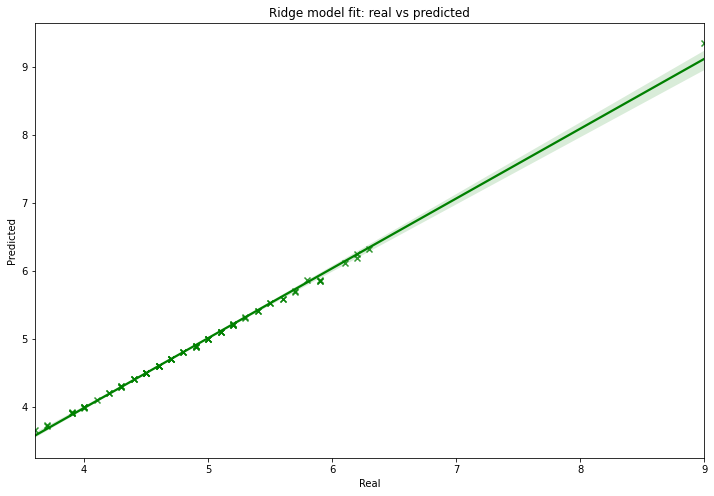

In [16]:
plt.figure(figsize = (12, 8))
ridge_plot = sns.regplot(x = ridge_df.consume_real,
                         y = ridge_df.consume_predicted,
                         color = 'g',
                         marker = 'x')

ridge_plot.set(xlabel = 'Real', 
               ylabel = 'Predicted',
               title = 'Ridge model fit: real vs predicted');
plt.show()

### As Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where independent variables are highly correlated, we would like to check if it is so fitted because of the enrichment of the dataset. 

So we are replicating the previous code with the clean (but not enriched) dataset

In [17]:
# reading the clean csv (not enriched yet)
df = pd.read_csv('dataset/df_clean.csv')

# we have a categorical column (gas_type) but we had already categorilized it on the column "gas_type_coded"
# E10 = 0 /// SP98 = 1
df = df.drop(['gas_type'], axis = 1)

# split dataset in X and y for supervised learning
X = df.drop(['consume'], axis = 1)
y = df.consume

# split dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# we decided to use different models
models = {"linear": LinearRegression(),
          "ridge": Ridge(),
          "lasso": Lasso(),
          "knn": KNeighborsRegressor(),
          "gradient": GradientBoostingRegressor(),
          "tree": DecisionTreeRegressor(),
          "forest": RandomForestRegressor()}

# we fit our models and get the metrics for each one
for name, model in models.items():
    print(f"--{name}--")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
    print("MSE:", metrics.mean_squared_error(y_test,y_pred))
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print("R2:", metrics.r2_score(y_test,y_pred))

--linear--
MAE: 0.6082772048467537
MSE: 0.7556591974854234
RMSE: 0.8692866026147092
R2: 0.20805504035986166
--ridge--
MAE: 0.6091107976152826
MSE: 0.7561722543636066
RMSE: 0.8695816547993677
R2: 0.20751734716425452
--lasso--
MAE: 0.6538521964080044
MSE: 0.8455342052775158
RMSE: 0.919529338997683
R2: 0.11386435273849027
--knn--
MAE: 0.40333333333333343
MSE: 0.30335897435897446
RMSE: 0.5507803322187299
R2: 0.6820741261343198
--gradient--
MAE: 0.42100643504807234
MSE: 0.3880785749231158
RMSE: 0.6229595291213674
R2: 0.5932864016246983
--tree--
MAE: 0.5666666666666667
MSE: 0.5612820512820512
RMSE: 0.7491875941858963
R2: 0.4117659218223536
--forest--
MAE: 0.36585498575498565
MSE: 0.24273140563469434
RMSE: 0.4926777908884206
R2: 0.7456129510784256


After checking that there was overfitting due to the fact that enrichment columns were a multiplication of the values contained in X and y, we decided to go on with **K Nearest Neighbours** despite it is more used for classification than for regression as it has the higher R squared. As well, we will also search for better parameters for **gradient boosting** and **random forest** models.

# Grid search: looking for parameters values in order to improve our model

### K Nearest Neighbours

In [18]:
knn = KNeighborsRegressor()

In [19]:
# Hyperparameter optimization 
parameters = {'n_neighbors': [2, 3, 4, 5],
              'weights': ['uniform','distance'],
              'leaf_size': [15, 30, 50]}

In [20]:
# we keep this code commented to avoid running it constant
'''
grid = GridSearchCV(knn, parameters, verbose = 1)
grid.fit(X_train,y_train)

# Print best params for KNN model
print(grid.best_params_)
'''

'\ngrid = GridSearchCV(knn, parameters, verbose = 1)\ngrid.fit(X_train,y_train)\n\n# Print best params for KNN model\nprint(grid.best_params_)\n'

In [21]:
knn_grid = KNeighborsRegressor(leaf_size = 15,
                               n_neighbors = 5, 
                               weights = 'uniform')

knn_grid = knn_grid.fit(X_train,y_train)
y_pred = knn_grid.predict(X_test)

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2:", metrics.r2_score(y_test,y_pred))

MAE: 0.40333333333333343
MSE: 0.30335897435897446
RMSE: 0.5507803322187299
R2: 0.6820741261343198


In [34]:
# create a new df with the real consume and the predicted consume, in order to plot it
knn_df = pd.DataFrame({'gas_type':X_test['gas_type_coded'].apply(lambda x: 'E10' if x == 0 else 'SP98'),
                         'consume_real':y_test,
                         'consume_predicted': y_pred})
knn_df.head()

,gas_type,consume_real,consume_predicted
353,SP98,3.7,4.312364
6,E10,4.4,4.937630
107,SP98,6.5,6.430771
171,E10,4.8,4.894826
43,E10,4.3,4.938153


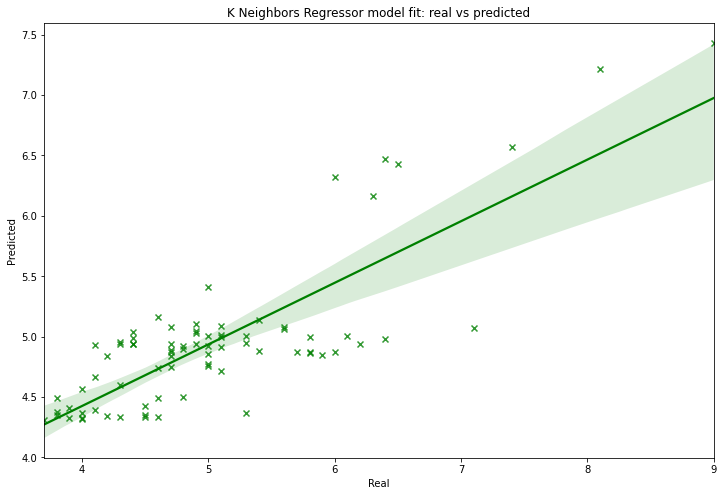

In [35]:
plt.figure(figsize = (12, 8))
knn_plot = sns.regplot(x = knn_df.consume_real,
                         y = knn_df.consume_predicted,
                         color = 'g',
                         marker = 'x')

knn_plot.set(xlabel = 'Real', 
               ylabel = 'Predicted',
               title = 'K Neighbors Regressor model fit: real vs predicted');
plt.show()

## Random Forest Regressor

In [22]:
forest = RandomForestRegressor()

In [23]:
# Hyperparameter optimization 
parameters = {'n_estimators': [10, 25, 50, 100, 250, 400],
             'criterion': ['mse', 'mae'],
             'max_depth': [1, 2, 3, 4],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2'],
             'bootstrap': ['True', 'False']}

In [24]:
# we keep this code commented to avoid running it constant
'''
grid = GridSearchCV(forest, parameters, verbose = 1)
grid.fit(X_train,y_train)

# Print best params for random forest model
print(grid.best_params_)

'''

'\ngrid = GridSearchCV(forest, parameters, verbose = 1)\ngrid.fit(X_train,y_train)\n\n# Print best params for random forest model\nprint(grid.best_params_)\n\n'

In [25]:
forest_grid = RandomForestRegressor(bootstrap = True, 
                                    criterion = 'mse',
                                    max_depth = 4,
                                    max_features = 'log2',
                                    min_samples_leaf = 3,
                                    n_estimators = 50)

forest_grid = forest_grid.fit(X_train,y_train)
y_pred = forest_grid.predict(X_test)

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2:", metrics.r2_score(y_test,y_pred))

MAE: 0.44435374718132375
MSE: 0.34561567944148597
RMSE: 0.5878908737525068
R2: 0.6377883095751423


## Gradient Boosting Regressor

In [26]:
gradient = GradientBoostingRegressor()

In [27]:
# Hyperparameter optimization 
parameters = {'loss': ['ls', 'lad', 'huber', 'quantile'],
              'n_estimators': ['10', '25', '50', '100', '250', '400'],
              'criterion': ['friendman_mse','mse', 'mae'], 
              'subsample': [0.9, 1.0, 1.1],
              'max_depth': [1, 2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

In [28]:
# we keep this code commented to avoid running it constant
'''
grid = GridSearchCV(gradient, parameters, verbose = 1)
grid.fit(X_train,y_train)

# Print best params for gradient boosting
print(grid.best_params_)
'''

'\ngrid = GridSearchCV(gradient, parameters, verbose = 1)\ngrid.fit(X_train,y_train)\n\n# Print best params for gradient boosting\nprint(grid.best_params_)\n'

In [29]:
gradient_grid = GradientBoostingRegressor(criterion='friedman_mse',
                                          loss = 'ls',
                                          max_depth = 1,
                                          max_features = 'auto',
                                          min_samples_leaf = 1,
                                          n_estimators = 10,
                                          subsample = 0.9)

gradient_grid = gradient_grid.fit(X_train,y_train)
y_pred = gradient_grid.predict(X_test)

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2:", metrics.r2_score(y_test,y_pred))

MAE: 0.5798885809778862
MSE: 0.547979235212322
RMSE: 0.740256195659531
R2: 0.42570752164737935


# Decision Tree Regressor

In [30]:
tree = DecisionTreeRegressor()

In [31]:
# Hyperparameter optimization 
parameters = {'criterion': ['mse', 'friendman_mse', 'mae', 'poisson'],
              'max_depth': [1, 2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

In [32]:
# we keep this code commented to avoid running it constant
'''
grid = GridSearchCV(tree, parameters, verbose = 1)
grid.fit(X_train,y_train)

# Print best params for decision tree
print(grid.best_params_)
'''

'\ngrid = GridSearchCV(tree, parameters, verbose = 1)\ngrid.fit(X_train,y_train)\n\n# Print best params for decision tree\nprint(grid.best_params_)\n'

In [33]:
tree_grid = GradientBoostingRegressor(criterion = 'mae',
                                          max_depth = 4,
                                          max_features = 'log2')

tree_grid = forest_grid.fit(X_train,y_train)
y_pred = forest_grid.predict(X_test)

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2:", metrics.r2_score(y_test,y_pred))

MAE: 0.45719901831046283
MSE: 0.36159613839840105
RMSE: 0.6013286442523764
R2: 0.6210404899683954
